<a href="https://colab.research.google.com/github/Mildredkulei7/Crime-Analysis-/blob/dev/Original_Crime_Analysis_Group2_Module2_Moringa_DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Defining the Question

### a) Specifying the Data Analytic Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

* 1.Defining the question 
* 2.Importing the libraries 
* 3.Reading the data 
* 4.Data preprocessing 
* 5.Exploratory data analysis(Biveriate summaries) 
* 6.Model creation 
* 7.Implementing solution 
* 8.Challenging solution

## 2. Reading the Data

In [136]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import pandas as pd
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
 
import matplotlib.pyplot as plt
 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
 
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:
# Loading the Data from the source i.e. csv
# ---
police_brutality= pd.read_csv('/content/drive/MyDrive/GROUP 2/CSV files/Police_Brutality.csv')

corruption=pd.read_csv('/content/drive/MyDrive/GROUP 2/CSV files/corruption_final.csv')

missing= pd.read_csv('/content/drive/MyDrive/GROUP 2/CSV files/final missing.csv')

pickpocket = pd.read_csv('/content/drive/MyDrive/GROUP 2/CSV files/pickpocket.csv')

murder =pd.read_csv('/content/drive/MyDrive/GROUP 2/CSV files/final murder.csv')

In [138]:
#checking the top of our dataset

police_brutality.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,ThinkerwaThika,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
1,1,ThinkerwaThika,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
2,2,Its_Roba,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya","A yearning heart, inquisitive, sometimes an ad...",2485,3765,11179,7/14/2015 22:23,1,[],Police Brutality
3,3,mwakodi,I lit these 2 candles tonight in their memory....,Nairobi,An outspoken human rights defender advocating ...,331,170,1988,11/29/2012 16:14,2,[],Police Brutality
4,4,muthuriamos,It seems being young in this country is a crim...,nairobi,"the goal is to get wealthier, wiser and health...",1901,1273,666,01/08/2014 04:39,1,[],Police Brutality


In [139]:
corruption.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,TIKenya,"As the political campaign season heats up, the...","Nairobi, Kenya",Transparency International Kenya | Not for Pro...,2309,15927,20315,8/19/2010 7:49,26,[],corruption
1,1,TimKurya,BEST DEALS ON LOCALLY AND FOREIGN USED VEHICLE...,"Nairobi, Kenya",NEVER LIMIT WHAT GOD CAN DO \nGOD OVER EVERYTHING,1082,1079,2171,1/4/2017 18:26,0,"[{'text': 'Corruption', 'indices': [95, 106]}]",corruption
2,2,Tuko_co_ke,"In your opinion, which political party/allianc...","Nairobi, Kenya",Follow TUKO for reliable breaking news on Poli...,4000,166335,107983,4/2/2015 13:49,6,[],corruption
3,3,WEnzoveli,#CORRUPTION FORM ZAMBIA TO KENYA ND THEN THE W...,"Kericho, Kenya",I'm a child of Yahweh.....Son/Brother/Linguist...,330,607,2631,1/10/2019 16:27,0,"[{'text': 'CORRUPTION', 'indices': [0, 11]}]",corruption
4,4,OkoreOkoth,#Corruption@helb @HELBpage @Owino @CisNyakundi...,nakuru,Portfolio manager and financial analyst at KWMB,302,127,724,1/20/2014 13:16,0,"[{'text': 'Corruption', 'indices': [0, 11]}]",corruption


In [140]:
missing.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,missingchild_ke,GOOD NEWS – CHILD FOUND. Wallace Misiko (16 yr...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction
1,1,1,missingchild_ke,GOOD NEWS – CHILD FOUND. Teresa Wairimu (15 y...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,0,[],abduction
2,2,2,missingchild_ke,MISSING CHILD ALERT – DAGORETTI - NAIROBI. Glo...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,35,[],abduction
3,3,3,missingchild_ke,MISSING CHILD ALERT – MUKURWEINI - NYERI. Tami...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,32,[],abduction
4,4,4,missingchild_ke,UPDATE – CHILD FOUND. Rudolf Mwenda Mwaniki (1...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction


In [141]:
pickpocket.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,NewsAlerts_Ke,@lawrencekitema Phone pickpocketing...ilikua o...,"Nairobi, Kenya",Digital Media and News 🗞️ Alerts_|To Inform|Ed...,3343,1167,825,21/01/2021 19:03,0,[],pickpocket
1,1,leyi_leleti,Now they're back to pickpocketing us kwa matatu,Nairobi Kenya,NaN,337,778,2547,23/06/2014 07:50,0,[],pickpocket
2,2,Raybo0mLynn,meet a 12 yr old who was arrested for pickpock...,Nairobi,NaN,582,648,4711,26/05/2009 05:47,2,[],pickpocket


In [142]:
murder.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,Partoz_COG,"Sad as Primary School Teacher Dies, Several St...",Nairobi Kenya,God cares for me and i will always trust in Him.,1346,279,1408,2012-03-27 06:45:19,1,[],murder
1,1,1,anj_116_,We need a #JusticeForKianjokomaBrothers and #K...,"Ba Sing Se, Earth Kingdom",GFB,10392,13516,246797,2011-03-09 10:46:29,3,"[{'text': 'JusticeForKianjokomaBrothers', 'ind...",murder
2,2,2,AlWandaabz,By this I mean if some people having these arm...,"Nairobi, Kenya",living on vibes and inshallah 😌.,273,218,2761,2017-06-12 19:12:12,0,[],murder
3,3,3,ImbayiK,@IG_NPS next week don't even ask us to engage....,"Nairobi, Kenya","Stylist || I'm not stylish, I'm style || Rhumb...",1029,15333,127640,2018-04-05 07:37:02,0,"[{'text': 'JusticeForKianjokomaBrothers', 'ind...",murder
4,4,4,bankwood_ke,puree facsts #KitengelaBrothers https://t.co/Z...,Juja,Family is an F word©️,734,769,2831,2019-07-03 10:56:06,0,"[{'text': 'KitengelaBrothers', 'indices': [13,...",murder


In [143]:
#checking the tail
police_brutality.tail()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
995,995,MkenyaD95974417,One of the Ndwiga Brothers was an aspiring Law...,Murang'a,"Polymath, Afro-optimist,Kenyan, Husband, Fathe...",677,201,15088,12/11/2019 13:09,5,"[{'text': 'IEK', 'indices': [95, 99]}, {'text'...",Police Brutality
996,996,Shikukega,#JusticeForKianjokomaBrothers\n#JusticeforEmma...,"Nairobi, Kenya",Its either 'One Day' or 'Day One',1146,1427,3093,1/17/2012 16:20,2,"[{'text': 'JusticeForKianjokomaBrothers', 'ind...",Police Brutality
997,997,karris_kikkie,why should two young souls never see the sun a...,"Nairobi, Kenya",FilmMaking and Theatre Perfomance...My kind of...,172,154,148,11/03/2014 05:08,0,[],Police Brutality
998,998,profkitur,It's reported that the officers who arrested t...,"Eldoret, Kenya",#ICT #Marketing #infosec #CyberSecurity,8753,15794,10823,5/13/2012 9:19,0,[],Police Brutality
999,999,mugendi934,We demand justice. #JusticeForKianjokomaBrothers,Nairobi,"Courageous,born to win and 100℅ Jesus. A farme...",1180,617,1381,4/30/2016 5:48,0,"[{'text': 'JusticeForKianjokomaBrothers', 'ind...",Police Brutality


In [144]:
corruption.tail()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
9,9,OkoreOkoth,@HELBpage @StateHouseKenya A thread on #Corrup...,nakuru,Portfolio manager and financial analyst at KWMB,302,127,724,1/20/2014 13:16,0,"[{'text': 'Corruption', 'indices': [39, 50]}]",corruption
10,10,skizadua,Always seek justice \n\n a...,"Nairobi, Kenya",I stand for fairness and equality.,473,640,16574,10/3/2015 15:27,0,"[{'text': 'HumanRights', 'indices': [95, 107]}]",corruption
11,11,AOgolla,#CORRUPTION of any nature is officially endors...,Kisumu,"Computer Software and hardware expert, Communi...",663,534,10457,7/5/2011 14:56,0,"[{'text': 'CORRUPTION', 'indices': [0, 11]}]",corruption
12,12,mandere,@NCIC_Kenya you are so toothless it hurts... Y...,"Nairobi, Kenya",Opportunity = LIFE! Who you are authentically...,3453,8413,134865,6/5/2009 17:17,0,[],corruption
13,13,sonofmanymums,"In this life decisions are like shitting, you ...",Manverse,Entertainerprenuer. Communicator. Menist. Beli...,2,931,487,3/18/2017 20:10,0,"[{'text': 'mejja', 'indices': [78, 84]}, {'tex...",corruption


In [145]:
murder.tail()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
48,48,48,monsieur_adede,@Generalmsenge @SamMacoha @johnchege @Osama_ot...,"nairobi,kenya","life is short,smile while you still have teeth...",606,359,5240,2012-09-18 06:41:46,4,[],murder
49,49,49,Rein_Asamo,Did tribalism play a role in the unfortunate m...,"Nairobi, Kenya",Economist,455,5067,41904,2016-04-30 18:48:57,1,"[{'text': 'KitengelaBrothers', 'indices': [55,...",murder
50,50,50,Osama_otero,#KitengelaBrothers Dont judge anyone by the lo...,"Nairobi, Kenya",Call/text 0700160868 for business inquiry. Som...,3525,51745,161169,2020-01-11 22:03:03,442,"[{'text': 'KitengelaBrothers', 'indices': [0, ...",murder
51,51,51,Theodoregeneral,Injustice is so painful! \n#JusticeForKianjoko...,Kenya,Entertainment,85,1589,5480,2017-08-28 08:10:19,1,"[{'text': 'JusticeForKianjokomaBrothers', 'ind...",murder
52,52,52,KOTReferee,This one has hit me so hard. \n\nAnother Kiten...,"Nairobi, Kenya",Lover of Peace and Fairness. #Art \nHii kenya ...,963,243,782,2012-11-19 06:53:56,3,"[{'text': 'KitengelaBrothers', 'indices': [61,...",murder


In [146]:
missing.tail()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
12,12,12,missingchild_ke,MISSING CHILD ALERT – KIRUNGU - MATHIOYA - MUR...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,16,[],abduction
13,13,13,missingchild_ke,MISSING CHILD ALERT – KIRUNGU - MATHIOYA - MUR...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,26,[],abduction
14,14,14,missingchild_ke,GOOD NEWS – CHILD FOUND. Anne Mate Wetende (15...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction
15,15,15,KenyanTraffic,: GOOD NEWS CHILD FOUND. Daniel Kibira Wanjiku...,Nairobi,#KenyanTraffic official account. 🇰🇪 We tweet t...,90088,568363,497709,2014-09-25 08:45:50,0,[],abduction
16,16,16,missingchild_ke,GOOD NEWS – CHILD FOUND. Daniel Kibira Wanjiku...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction


In [147]:
pickpocket.tail()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,NewsAlerts_Ke,@lawrencekitema Phone pickpocketing...ilikua o...,"Nairobi, Kenya",Digital Media and News 🗞️ Alerts_|To Inform|Ed...,3343,1167,825,21/01/2021 19:03,0,[],pickpocket
1,1,leyi_leleti,Now they're back to pickpocketing us kwa matatu,Nairobi Kenya,NaN,337,778,2547,23/06/2014 07:50,0,[],pickpocket
2,2,Raybo0mLynn,meet a 12 yr old who was arrested for pickpock...,Nairobi,NaN,582,648,4711,26/05/2009 05:47,2,[],pickpocket


In [148]:
print('Police:', police_brutality.shape,'\n') 
print('Corruption:',corruption.shape, '\n')
print('Murder:', murder.shape, '\n')
print('Pickpocket:', pickpocket.shape, '\n')
print('Missing:', missing.shape)

Police: (1000, 12) 

Corruption: (14, 12) 

Murder: (53, 13) 

Pickpocket: (3, 12) 

Missing: (17, 13)


In [149]:
murder.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user', 'tweet', 'location',
       'description', 'friends_count', 'followers_count', 'statuses_count',
       'created_at', 'retweet_count', 'hashtags', 'label'],
      dtype='object')

In [150]:
police_brutality.columns

Index(['Unnamed: 0', 'user', 'tweet', 'location', 'description',
       'friends_count', 'followers_count', 'statuses_count', 'created_at',
       'retweet_count', 'hashtags', 'label'],
      dtype='object')

In [151]:
missing.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user', 'tweet', 'location',
       'description', 'friends_count', 'followers_count', 'statuses_count',
       'created_at', 'retweet_count', 'hashtags', 'label'],
      dtype='object')

In [152]:
corruption.columns

Index(['Unnamed: 0', 'user', 'tweet', 'location', 'description',
       'friends_count', 'followers_count', 'statuses_count', 'created_at',
       'retweet_count', 'hashtags', 'label'],
      dtype='object')

In [153]:
pickpocket.columns

Index(['Unnamed: 0', 'user', 'tweet', 'location', 'description',
       'friends_count', 'followers_count', 'statuses_count', 'created_at',
       'retweet_count', 'hashtags', 'label'],
      dtype='object')

Deleting the duplicated column 


In [154]:
missing.drop('Unnamed: 0.1', inplace=True, axis=1)
missing.shape

(17, 12)

In [155]:
murder.drop('Unnamed: 0.1', inplace=True, axis=1)
murder.shape

(53, 12)

Concatenating the files.

In [156]:
frames = [police_brutality, murder, missing, pickpocket]
  
result = pd.concat(frames)
display(result)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,ThinkerwaThika,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
1,1,ThinkerwaThika,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
2,2,Its_Roba,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya","A yearning heart, inquisitive, sometimes an ad...",2485,3765,11179,7/14/2015 22:23,1,[],Police Brutality
3,3,mwakodi,I lit these 2 candles tonight in their memory....,Nairobi,An outspoken human rights defender advocating ...,331,170,1988,11/29/2012 16:14,2,[],Police Brutality
4,4,muthuriamos,It seems being young in this country is a crim...,nairobi,"the goal is to get wealthier, wiser and health...",1901,1273,666,01/08/2014 04:39,1,[],Police Brutality
...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,KenyanTraffic,: GOOD NEWS CHILD FOUND. Daniel Kibira Wanjiku...,Nairobi,#KenyanTraffic official account. 🇰🇪 We tweet t...,90088,568363,497709,2014-09-25 08:45:50,0,[],abduction
16,16,missingchild_ke,GOOD NEWS – CHILD FOUND. Daniel Kibira Wanjiku...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction
0,0,NewsAlerts_Ke,@lawrencekitema Phone pickpocketing...ilikua o...,"Nairobi, Kenya",Digital Media and News 🗞️ Alerts_|To Inform|Ed...,3343,1167,825,21/01/2021 19:03,0,[],pickpocket
1,1,leyi_leleti,Now they're back to pickpocketing us kwa matatu,Nairobi Kenya,NaN,337,778,2547,23/06/2014 07:50,0,[],pickpocket


In [157]:
result.to_csv('crime.csv')



## 3. Checking the Data

In [158]:
#loading our concatenated data

crime = pd.read_csv('/content/crime.csv')
crime.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,ThinkerwaThika,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
1,1,1,ThinkerwaThika,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
2,2,2,Its_Roba,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya","A yearning heart, inquisitive, sometimes an ad...",2485,3765,11179,7/14/2015 22:23,1,[],Police Brutality
3,3,3,mwakodi,I lit these 2 candles tonight in their memory....,Nairobi,An outspoken human rights defender advocating ...,331,170,1988,11/29/2012 16:14,2,[],Police Brutality
4,4,4,muthuriamos,It seems being young in this country is a crim...,nairobi,"the goal is to get wealthier, wiser and health...",1901,1273,666,01/08/2014 04:39,1,[],Police Brutality


In [159]:
# Previewing the top of our dataset
# Train dataset
crime.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
0,0,0,ThinkerwaThika,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
1,1,1,ThinkerwaThika,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",This Is Eddie✌\nGreat Thinker 💭\nWriter 📒\nMat...,688,1340,7383,6/19/2016 6:57,0,[],Police Brutality
2,2,2,Its_Roba,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya","A yearning heart, inquisitive, sometimes an ad...",2485,3765,11179,7/14/2015 22:23,1,[],Police Brutality
3,3,3,mwakodi,I lit these 2 candles tonight in their memory....,Nairobi,An outspoken human rights defender advocating ...,331,170,1988,11/29/2012 16:14,2,[],Police Brutality
4,4,4,muthuriamos,It seems being young in this country is a crim...,nairobi,"the goal is to get wealthier, wiser and health...",1901,1273,666,01/08/2014 04:39,1,[],Police Brutality


In [160]:
#train dataset bottom
crime.tail()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,label
1068,15,15,KenyanTraffic,: GOOD NEWS CHILD FOUND. Daniel Kibira Wanjiku...,Nairobi,#KenyanTraffic official account. 🇰🇪 We tweet t...,90088,568363,497709,2014-09-25 08:45:50,0,[],abduction
1069,16,16,missingchild_ke,GOOD NEWS – CHILD FOUND. Daniel Kibira Wanjiku...,"Nairobi, Kenya",Search Trace & Reunification for MISSING CHILD...,9250,10708,3613,2016-07-12 11:42:35,1,[],abduction
1070,0,0,NewsAlerts_Ke,@lawrencekitema Phone pickpocketing...ilikua o...,"Nairobi, Kenya",Digital Media and News 🗞️ Alerts_|To Inform|Ed...,3343,1167,825,21/01/2021 19:03,0,[],pickpocket
1071,1,1,leyi_leleti,Now they're back to pickpocketing us kwa matatu,Nairobi Kenya,NaN,337,778,2547,23/06/2014 07:50,0,[],pickpocket
1072,2,2,Raybo0mLynn,meet a 12 yr old who was arrested for pickpock...,Nairobi,NaN,582,648,4711,26/05/2009 05:47,2,[],pickpocket


In [161]:
# Checking the number of rows
crime.shape

(1073, 13)

In [162]:
#checking the datatypes
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1073 non-null   int64 
 1   Unnamed: 0.1     1073 non-null   int64 
 2   user             1073 non-null   object
 3   tweet            1073 non-null   object
 4   location         1070 non-null   object
 5   description      1027 non-null   object
 6   friends_count    1073 non-null   int64 
 7   followers_count  1073 non-null   int64 
 8   statuses_count   1073 non-null   int64 
 9   created_at       1073 non-null   object
 10  retweet_count    1073 non-null   int64 
 11  hashtags         1073 non-null   object
 12  label            1073 non-null   object
dtypes: int64(6), object(7)
memory usage: 109.1+ KB


## 4. Tidying the Dataset

In [163]:
# Dealing with the Missing Data
#
crime.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
user                0
tweet               0
location            3
description        46
friends_count       0
followers_count     0
statuses_count      0
created_at          0
retweet_count       0
hashtags            0
label               0
dtype: int64

In [164]:
crime.duplicated().sum()

0

Deleting unwanted columns

In [165]:
crime.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user', 'tweet', 'location',
       'description', 'friends_count', 'followers_count', 'statuses_count',
       'created_at', 'retweet_count', 'hashtags', 'label'],
      dtype='object')

In [166]:
crime.drop(['Unnamed: 0', 'Unnamed: 0.1', 'user', 'friends_count', 'followers_count', 'statuses_count', 'created_at', 'retweet_count'], axis=1, inplace=True)

In [167]:
crime.drop('description', axis=1, inplace=True)

In [168]:
crime.shape

(1073, 4)

In [169]:
crime.head(2)

,tweet,location,hashtags,label
0,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",[],Police Brutality
1,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",[],Police Brutality


In [170]:
#removing the URL links
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [171]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [172]:
crime['tweet']=crime['tweet'].apply(lambda x : remove_URL(x))

In [173]:
crime.head()

,tweet,location,hashtags,label
0,@citizentvkenya It's at the extremity of life ...,"Nairobi, Kenya",[],Police Brutality
1,@EileenWakesho I'm Feeling hurt ...I really fe...,"Nairobi, Kenya",[],Police Brutality
2,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya",[],Police Brutality
3,I lit these 2 candles tonight in their memory....,Nairobi,[],Police Brutality
4,It seems being young in this country is a crim...,nairobi,[],Police Brutality


In [174]:
#removing all the panctuation marks in 'text' column
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [175]:
crime['tweet']=crime['tweet'].apply(lambda x : remove_punct(x))

In [176]:
crime.head()

,tweet,location,hashtags,label
0,citizentvkenya Its at the extremity of life be...,"Nairobi, Kenya",[],Police Brutality
1,EileenWakesho Im Feeling hurt I really feel it...,"Nairobi, Kenya",[],Police Brutality
2,Every time I learn sth about the Kionjokama br...,"Nairobi, Kenya",[],Police Brutality
3,I lit these 2 candles tonight in their memory ...,Nairobi,[],Police Brutality
4,It seems being young in this country is a crim...,nairobi,[],Police Brutality


In [177]:
#putting the tweet characters to lower case
crime['tweet'] = crime['tweet'].map(lambda x: x.lower())

In [178]:
crime.head()

,tweet,location,hashtags,label
0,citizentvkenya its at the extremity of life be...,"Nairobi, Kenya",[],Police Brutality
1,eileenwakesho im feeling hurt i really feel it...,"Nairobi, Kenya",[],Police Brutality
2,every time i learn sth about the kionjokama br...,"Nairobi, Kenya",[],Police Brutality
3,i lit these 2 candles tonight in their memory ...,Nairobi,[],Police Brutality
4,it seems being young in this country is a crim...,nairobi,[],Police Brutality


In [179]:
#function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [180]:
#removing the emojis in text column if any.
crime['tweet']=crime['tweet'].apply(lambda x: remove_emoji(x))

In [181]:
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)



In [182]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [183]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [184]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
crime['clean_text'] = crime['tweet'].apply(lambda x: finalpreprocess(x))
crime.head()

,tweet,location,hashtags,label,clean_text
0,citizentvkenya its at the extremity of life be...,"Nairobi, Kenya",[],Police Brutality,citizentvkenya extremity life take granted wit...
1,eileenwakesho im feeling hurt i really feel it...,"Nairobi, Kenya",[],Police Brutality,eileenwakesho im feel hurt really feel rogue o...
2,every time i learn sth about the kionjokama br...,"Nairobi, Kenya",[],Police Brutality,every time learn sth kionjokama brother heart ...
3,i lit these 2 candles tonight in their memory ...,Nairobi,[],Police Brutality,lit candle tonight memory reflection candle re...
4,it seems being young in this country is a crim...,nairobi,[],Police Brutality,seem young country crime depression due system...


In [185]:
# Tokenizing the messages into into single words using nltk. 

# Applying the tokenization
# 
#crime['clean_text']= crime['clean_text'].apply(nltk.word_tokenize)

In [186]:
crime.head(2)

,tweet,location,hashtags,label,clean_text
0,citizentvkenya its at the extremity of life be...,"Nairobi, Kenya",[],Police Brutality,citizentvkenya extremity life take granted wit...
1,eileenwakesho im feeling hurt i really feel it...,"Nairobi, Kenya",[],Police Brutality,eileenwakesho im feel hurt really feel rogue o...


In [187]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"

X_train, X_val, y_train, y_val = train_test_split(crime["clean_text"], 
                                                  crime['label'],
                                                  test_size=0.33,
                                                  shuffle=True)
#X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec # X_train

In [188]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
#
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

In [189]:
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

## 5. Exploratory Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

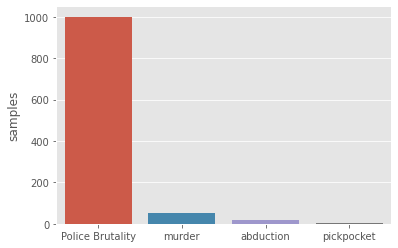

In [190]:
x=crime.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

## 6. Modelling

### Neural Network

### KNN

### Naive Bayes

### Random Forest

Logistic

## 7. Challenging the solution

## 8. Recommendation